# Calculate climatology and anomaly of ERA5 net shortwave and sst

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import json
import gcsfs
from scipy.signal import detrend

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/sw_sst.zarr'))

## Shortwave

In [2]:
#convert sw from J/m^2 -> W/m^2
sw_wm2 = ds.ssr / (60*60)
#resample to daily freq (hourly too noisy
sw = sw_wm2.resample(time='D').mean('time')

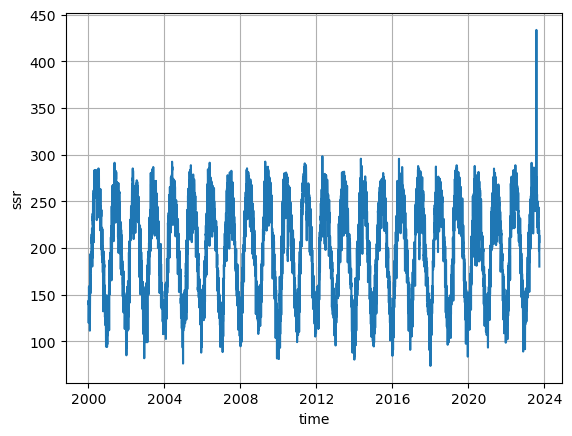

In [3]:
sw.mean(['latitude', 'longitude']).plot()
plt.grid();

In [4]:
mo_clim_sw = (sw).groupby('time.month').mean(['time', 'latitude', 'longitude'])
mo_anom_sw = (sw).groupby('time.month') - mo_clim_sw

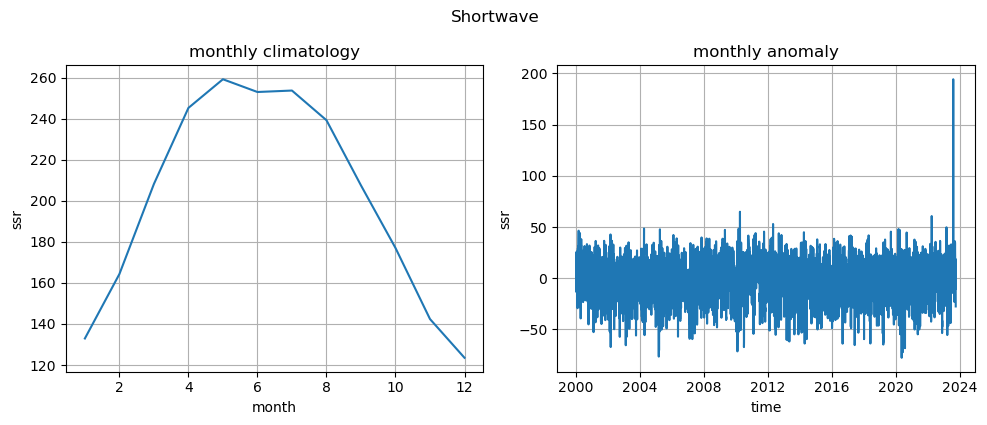

In [5]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

mo_clim_sw.plot(ax=ax0)
ax0.set_title('monthly climatology')
ax0.grid()
mo_anom_sw.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('Shortwave', y=1.05);

In [6]:
yr_clim_sw = (sw).groupby('time.year').mean(['time', 'latitude', 'longitude'])
yr_anom_sw = (sw).groupby('time.year') - yr_clim_sw

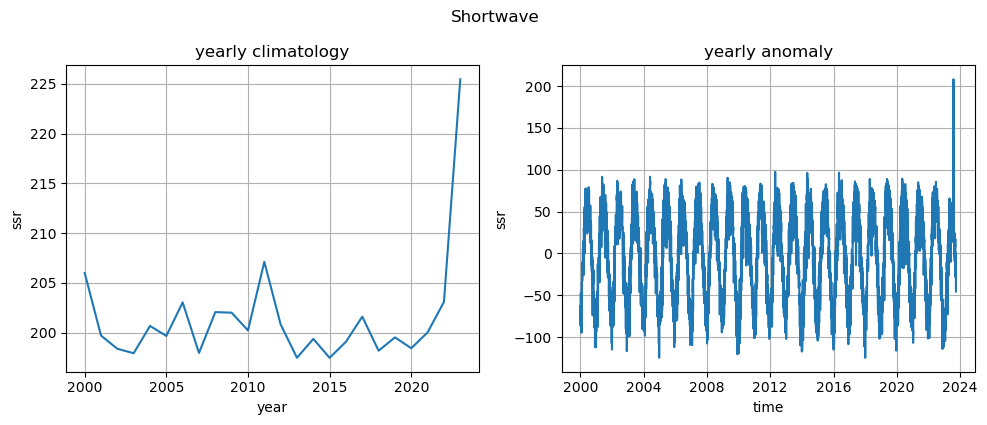

In [7]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

yr_clim_sw.plot(ax=ax0)
ax0.set_title('yearly climatology')
ax0.grid()
yr_anom_sw.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('Shortwave', y=1.05);

## Detrended Shortwave

In [8]:
sw_detrend_ufunc = xr.apply_ufunc(detrend, sw.fillna(0.).chunk({'time':-1}), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[sw.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [9]:
sw_detrend_ufunc

<xarray.DataArray 'ssr' (latitude: 37, longitude: 113, time: 8717)>
dask.array<transpose, shape=(37, 113, 8717), dtype=float32, chunksize=(37, 113, 8717), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.25 22.5 22.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2023-11-12

In [10]:
mo_clim_sw_d = sw_detrend_ufunc.groupby('time.month').mean(['time'])
mo_anom_sw_d = sw_detrend_ufunc.groupby('time.month') - mo_clim_sw_d

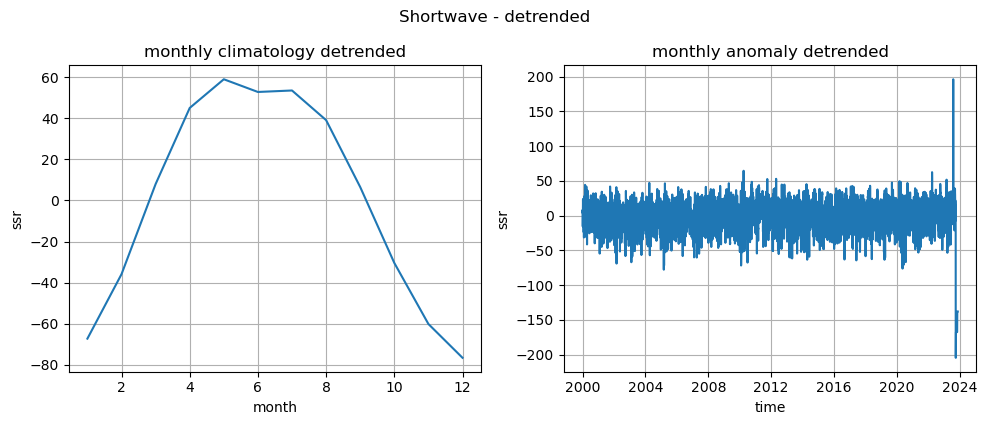

In [11]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

mo_clim_sw_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('monthly climatology detrended')
ax0.grid()
mo_anom_sw_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('Shortwave - detrended', y=1.05);

In [12]:
yr_clim_sw_d = sw_detrend_ufunc.groupby('time.year').mean(['time'])
yr_anom_sw_d = sw_detrend_ufunc.groupby('time.year') - yr_clim_sw_d

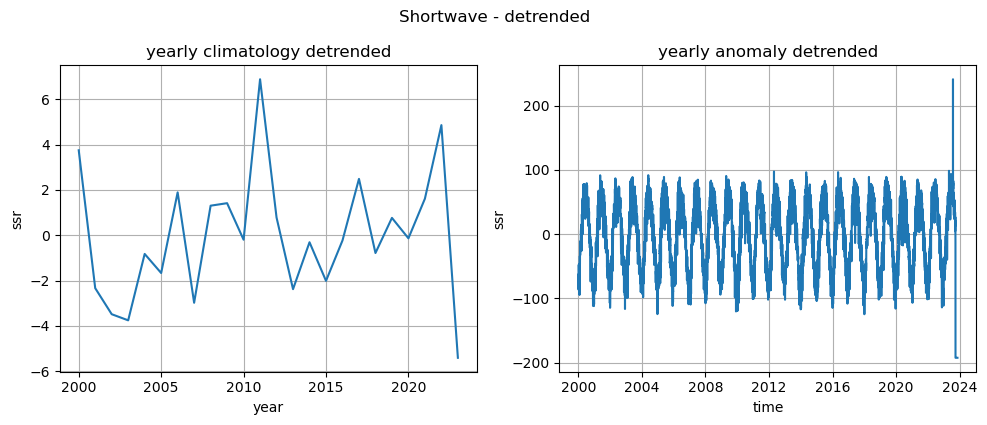

In [13]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

yr_clim_sw_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('yearly climatology detrended')
ax0.grid()
yr_anom_sw_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('Shortwave - detrended', y=1.05);

## SST

In [14]:
#convert to ˚C and resample to daily freq (hourly too noisy)
sst = (ds.sst-273.15).resample(time='D').mean('time')

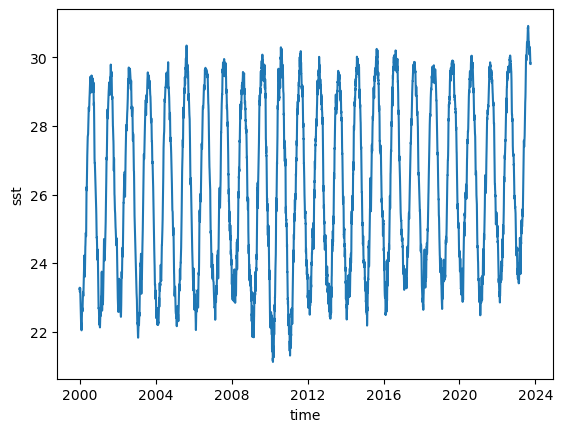

In [15]:
sst.mean(['latitude', 'longitude']).plot()

In [16]:
mo_clim_sst = sst.groupby('time.month').mean(['time', 'latitude', 'longitude'])
mo_anom_sst = sst.groupby('time.month') - mo_clim_sst

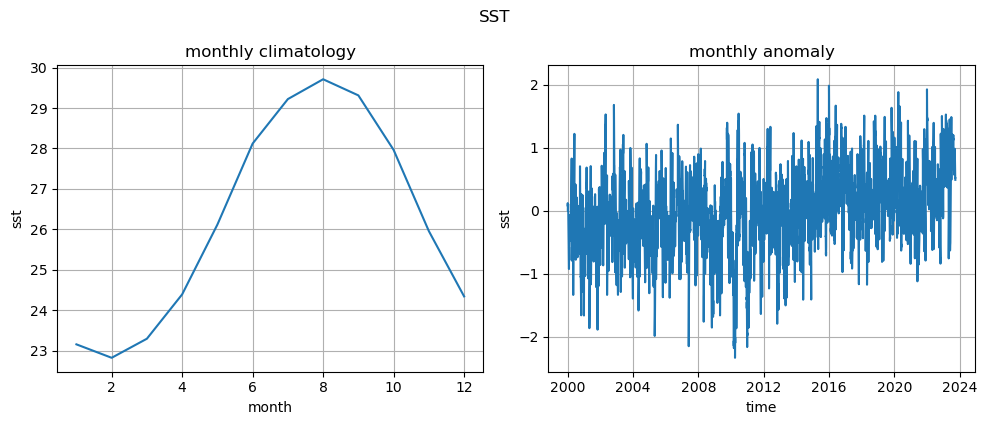

In [17]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

mo_clim_sst.plot(ax=ax0)
ax0.set_title('monthly climatology')
ax0.grid()
mo_anom_sst.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST', y=1.05);

In [18]:
yr_clim_sst = sst.groupby('time.year').mean(['time', 'latitude', 'longitude'])
yr_anom_sst = sst.groupby('time.year') - yr_clim_sst

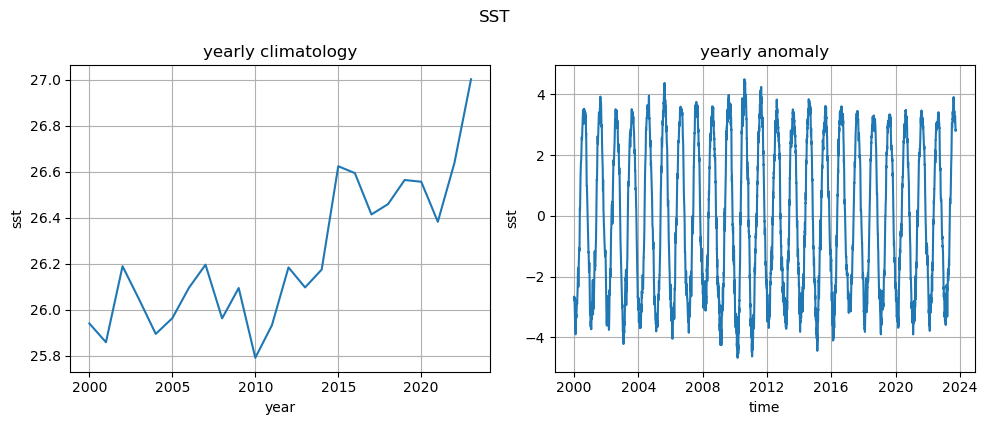

In [19]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

yr_clim_sst.plot(ax=ax0)
ax0.set_title('yearly climatology')
ax0.grid()
yr_anom_sst.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST', y=1.05);

## Detrended SST

In [20]:
sst_detrend_ufunc = xr.apply_ufunc(detrend, sst.fillna(0.).chunk({'time':-1}), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[sst.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [21]:
sst_detrend_ufunc

<xarray.DataArray 'sst' (latitude: 37, longitude: 113, time: 8717)>
dask.array<transpose, shape=(37, 113, 8717), dtype=float32, chunksize=(37, 113, 8717), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.25 22.5 22.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2023-11-12

In [22]:
mo_clim_sst_d = sst_detrend_ufunc.groupby('time.month').mean(['time'])
mo_anom_sst_d = sst_detrend_ufunc.groupby('time.month') - mo_clim_sst_d

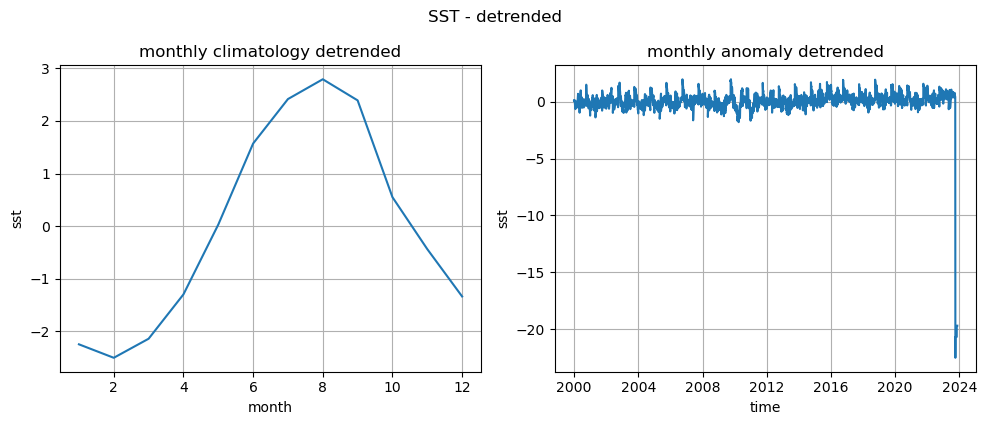

In [23]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

mo_clim_sst_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('monthly climatology detrended')
ax0.grid()
mo_anom_sst_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST - detrended', y=1.05);

In [24]:
yr_clim_sst_d = sst_detrend_ufunc.groupby('time.year').mean(['time'])
yr_anom_sst_d = sst_detrend_ufunc.groupby('time.year') - yr_clim_sst_d

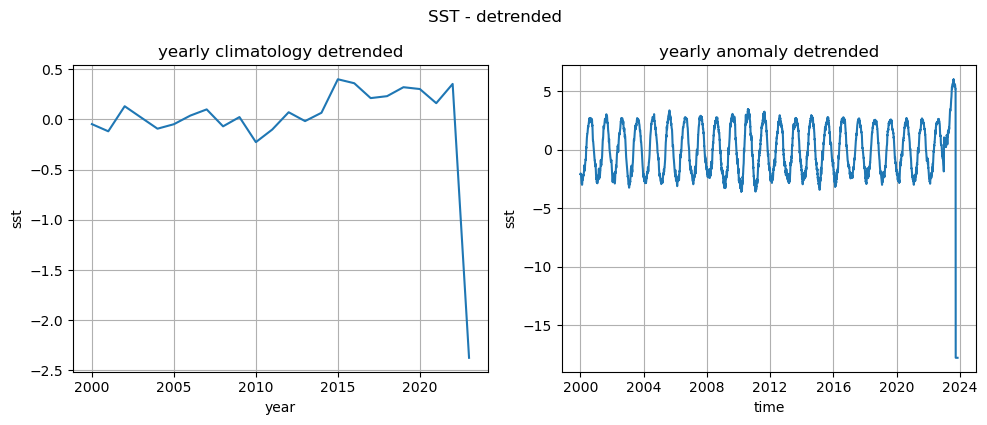

In [25]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))

yr_clim_sst_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('yearly climatology detrended')
ax0.grid()
yr_anom_sst_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST - detrended', y=1.05);